In [47]:
# Dependencies and Setup
import json
import requests
from config import api_key     # Import API key
import random
import matplotlib.pyplot as plt  # Create graphs
import numpy as np
import pandas as pd
import csv
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

622

In [49]:
print(type(cities)) 

<class 'list'>


In [50]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [51]:
cities1 = cities[0:500] # can only pull 20 cities within 1 minute

# NEED TO APPLY TRY AND EXCEPT TO SLOW DOWN RECORD 

# set up lists to hold reponse info
lon = []
lat = []
temp = []  # max temperature in celsius
humidity=[]  # percent humidity
speed = []  # miles per hour wind speed
clouds = []  # percent cloudiness
id = []
name = []

# Loop through the list of cities and perform a request for data on each
for city in cities1:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    temp.append(response['main']['temp_max'])
    humidity.append(response["main"]["humidity"])
    speed.append(response["wind"]["speed"])
    clouds.append(response["clouds"]["all"])
    id.append(response["id"])
    name.append(response["name"])

print(f"The latitude information received is: {lat, lon}")
print(f"The temperature information received is: {temp}")
print(f"The humity information received is: {humidity}")
print(f"The wind information received is: {speed}")
print(f"The clouds information received is: {clouds}")
print(f"The city id information received is: {id}")
print(f"The city name information received is: {name}")

KeyError: 'coord'

In [ ]:
# create a data frame from cities information
weather_dict = {
    "city id": id,
    "city": name,
    "lat": lat,
    "lon": lon,
    "max_temp": temp,
    "humidity": humidity,
    "speed": speed,
    "clouds": clouds,
    }
weather_data = pd.DataFrame(weather_dict)

# sort based upon multiple columns
weather_data = weather_data.sort_values(
    ["city", "lat"], ascending=True)

# The index can be reset to provide index numbers 
weather_data = weather_data.reset_index(drop=True)

weather_data

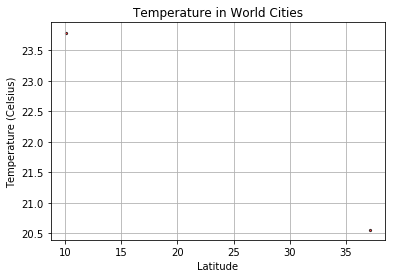

In [52]:
# plot scatter temp vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["max_temp"]

plt.scatter(x_data, y_data, marker="o", facecolors="red", edgecolors="black",
            s=5, alpha=0.75)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

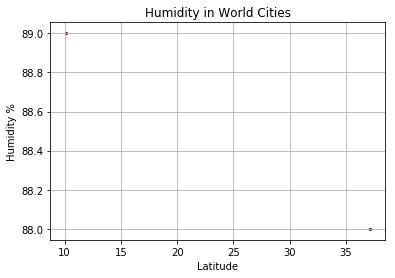

In [54]:
# plot humidity vs lat
# plot scatter humidity vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["humidity"]

plt.scatter(x_data, y_data, marker="o", facecolors="red", edgecolors="black",
            s=5, alpha=0.75)

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()


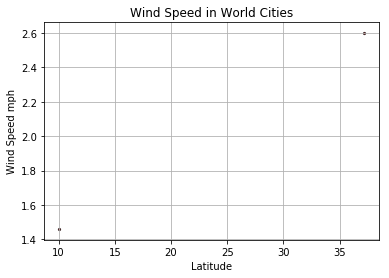

In [55]:
# plot wind
# plot scatter speed vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["speed"]

plt.scatter(x_data, y_data, marker="o", facecolors="red", edgecolors="black",
            s=5, alpha=0.75)

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

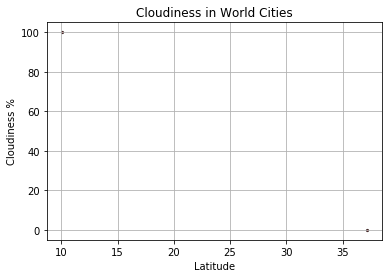

In [56]:
# plot cloud
# plot scatter speed vs lat - The size of each point on our plot is determined by their x value
x_data = weather_data["lat"]
y_data = weather_data["clouds"]

plt.scatter(x_data, y_data, marker="o", facecolors="red", edgecolors="black",
            s=5, alpha=0.75)

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudsInWorldCities.png")

# Show plot
plt.show()